In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
df = pd.read_csv("StockData.csv", encoding = "latin1")
print(df.head(5))

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [22]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [7]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


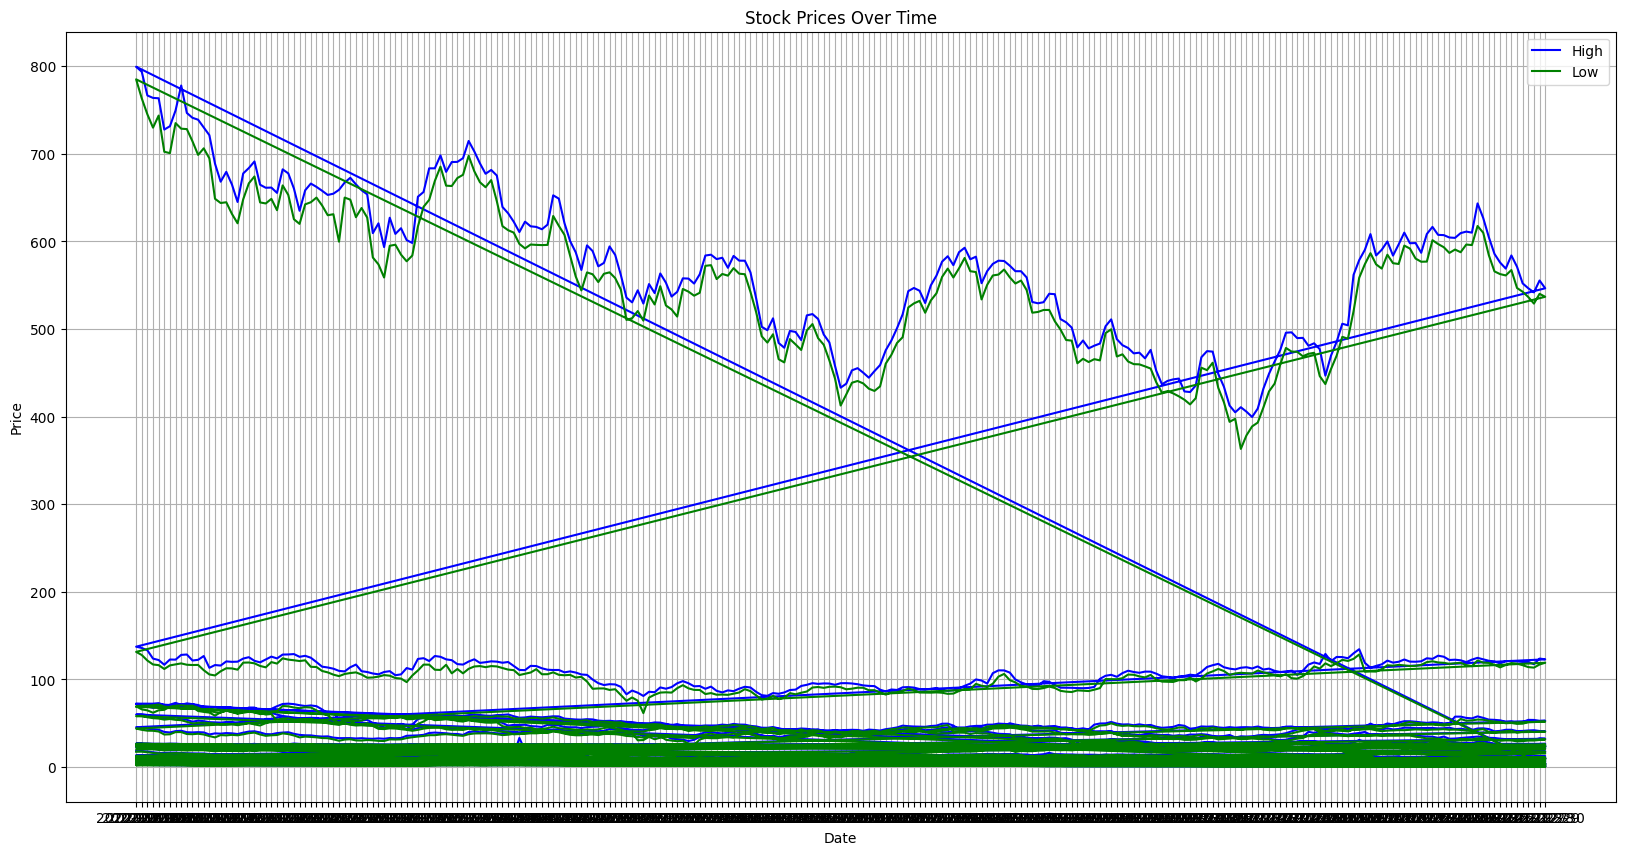

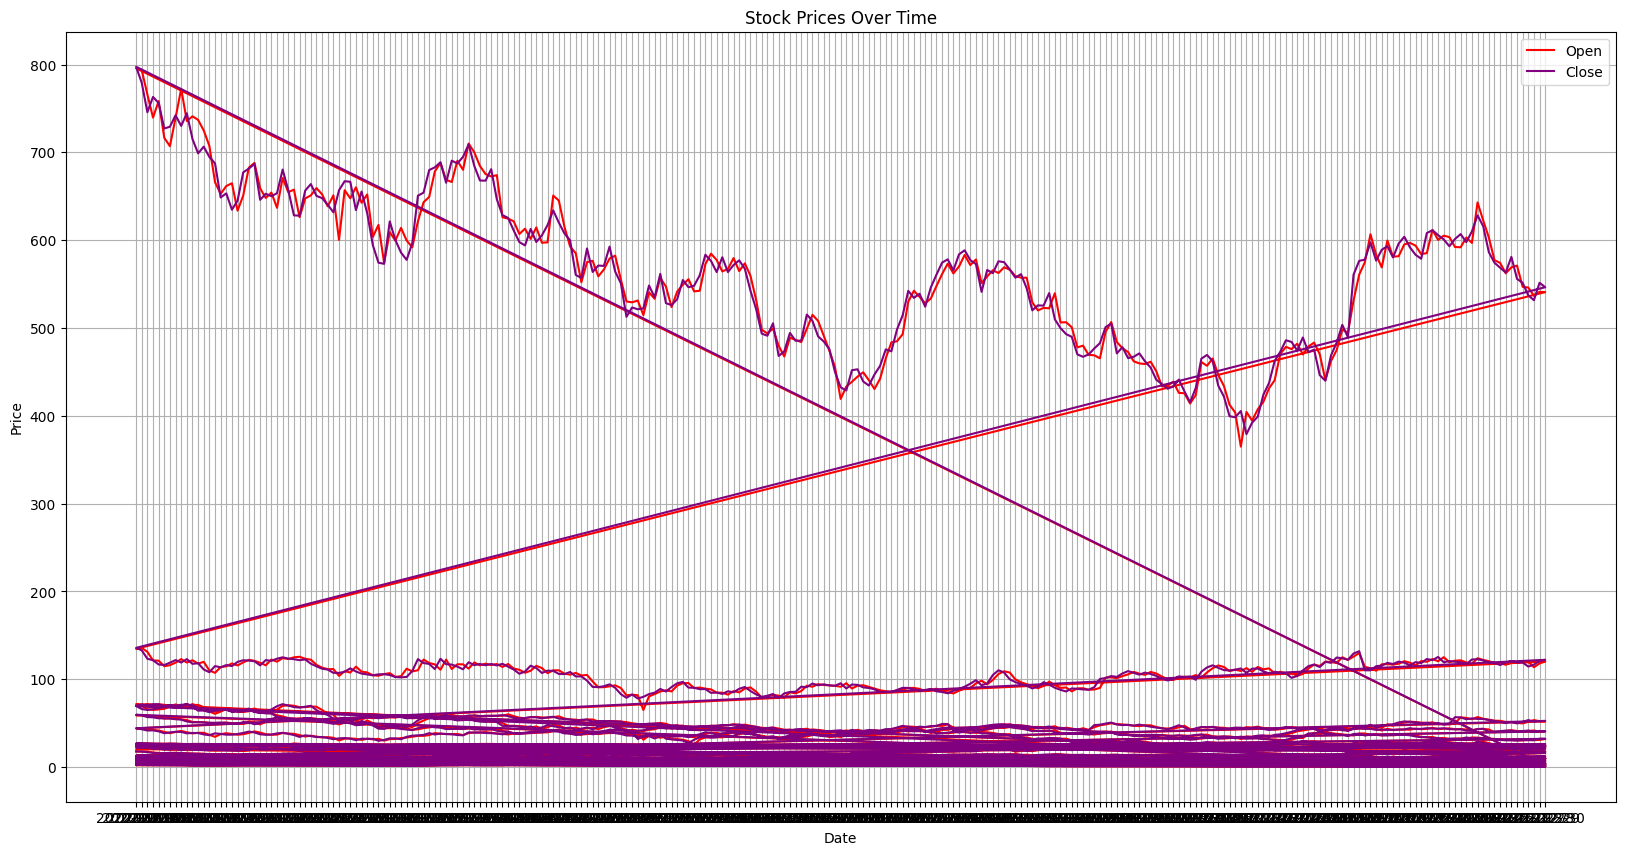

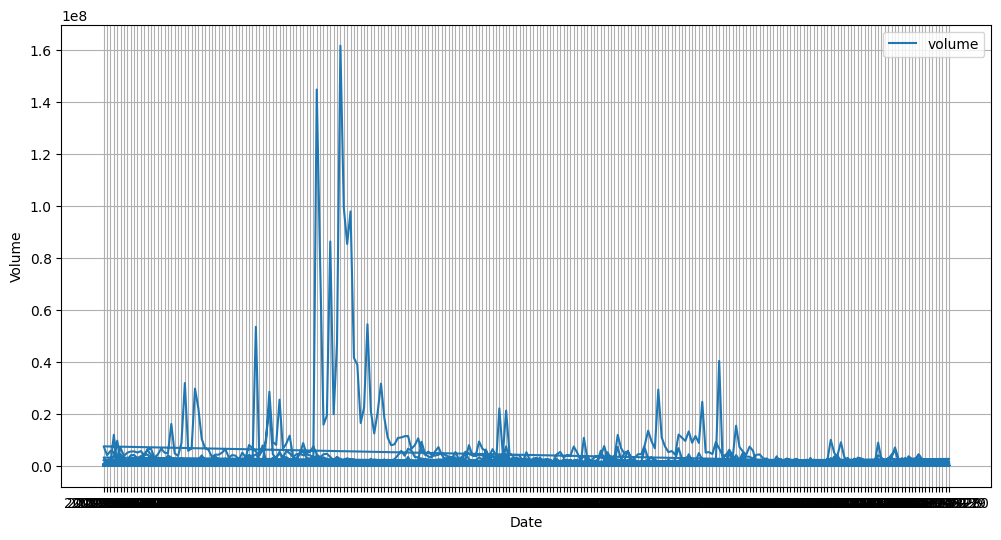

In [8]:
plt.figure(figsize=(20, 10))  
# Plot multiple columns on the same plot
plt.plot(df['date'], df['high'], label='High', color='blue')
plt.plot(df['date'], df['low'], label='Low', color='green')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True) 
plt.legend() 
plt.show()
plt.figure(figsize=(20, 10))  
plt.plot(df['date'], df['open'], label='Open', color='red')
plt.plot(df['date'], df['close'], label='Close', color='purple')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True) 
plt.legend() 
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'], label="volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

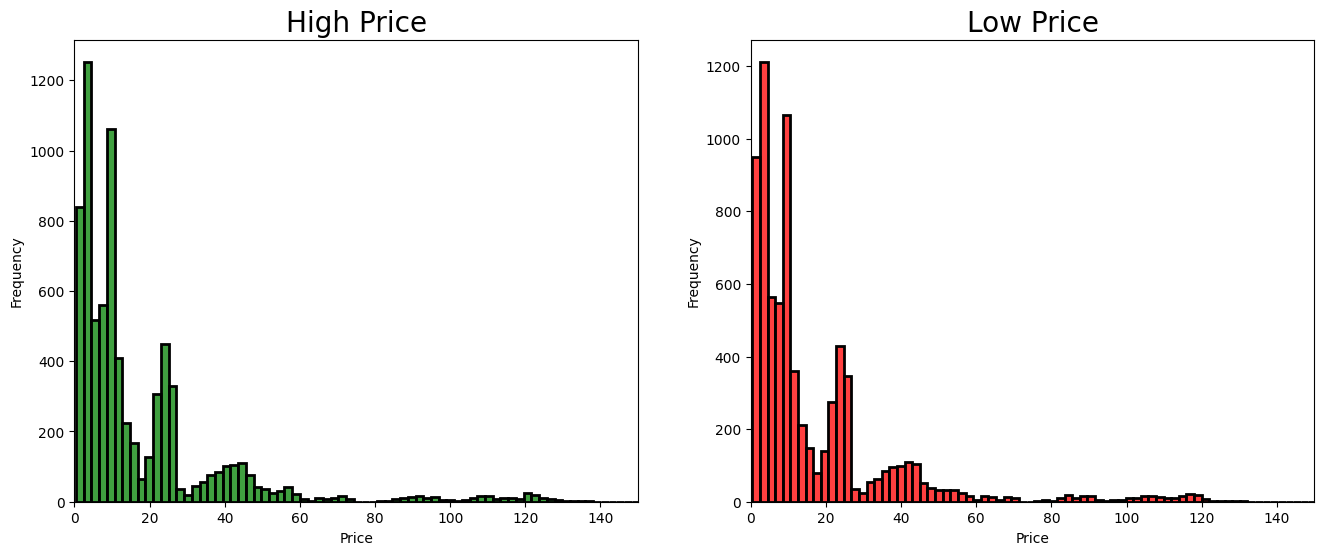

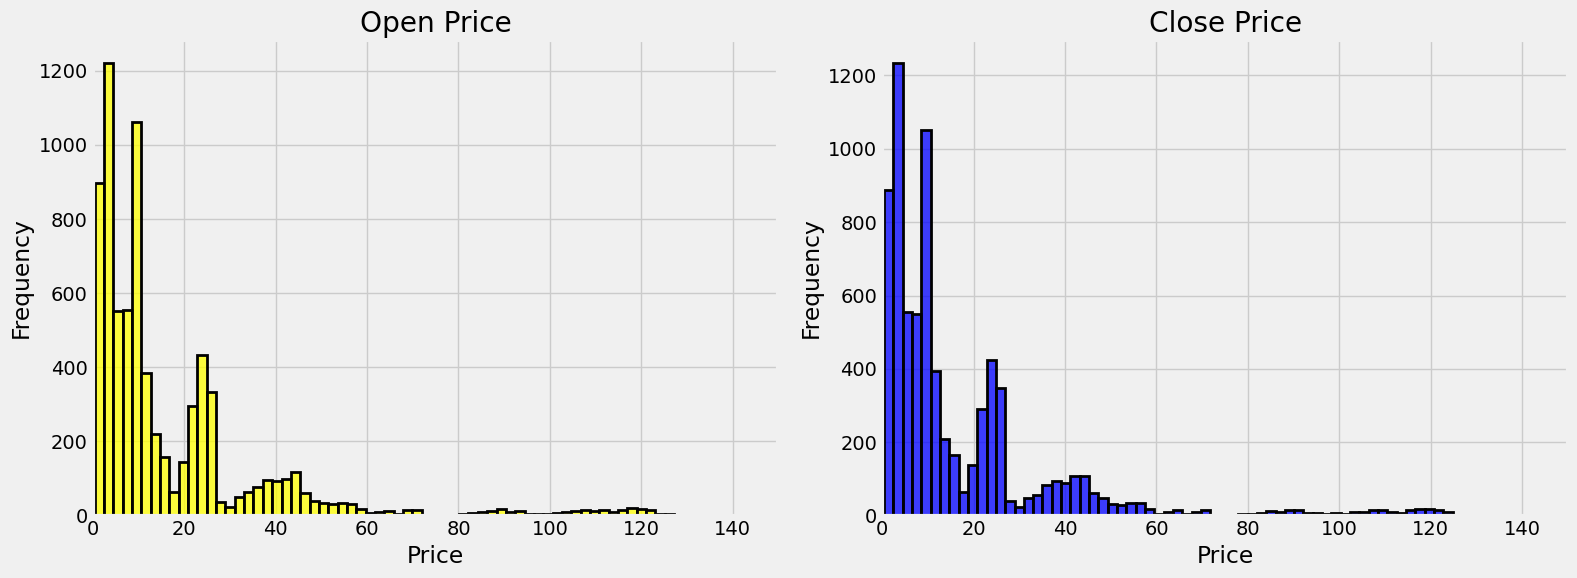

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.style.use('fivethirtyeight')
sns.histplot(df['high'], ax=axes[0], color="green", edgecolor="black", linewidth=2)
axes[0].set_title("High Price")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, 150)  # Set the x-axis limit to 150
sns.histplot(df['low'], ax=axes[1], color="red", edgecolor="black", linewidth=2)
axes[1].set_title("Low Price")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(0, 150)  # Set the x-axis limit to 150

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(df['open'], ax=axes[0], color="yellow", edgecolor="black", linewidth=2)
axes[0].set_title("Open Price")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, 150)  # Set the x-axis limit to 150
sns.histplot(df['close'], ax=axes[1], color="blue", edgecolor="black", linewidth=2)
axes[1].set_title("Close Price")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(0, 150)  # Set the x-axis limit to 150
plt.tight_layout()
plt.show()

In [10]:
figure = px.scatter(data_frame = df, x="open",y="close", size="close", trendline="ols", title = "Relationship Between Open Price and Close Price")
figure.show()
figure = px.scatter(data_frame = df, x="high",y="low", size="high", trendline="ols", title = "Relationship Between High Price and Low Price")
figure.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 3000x1000 with 0 Axes>

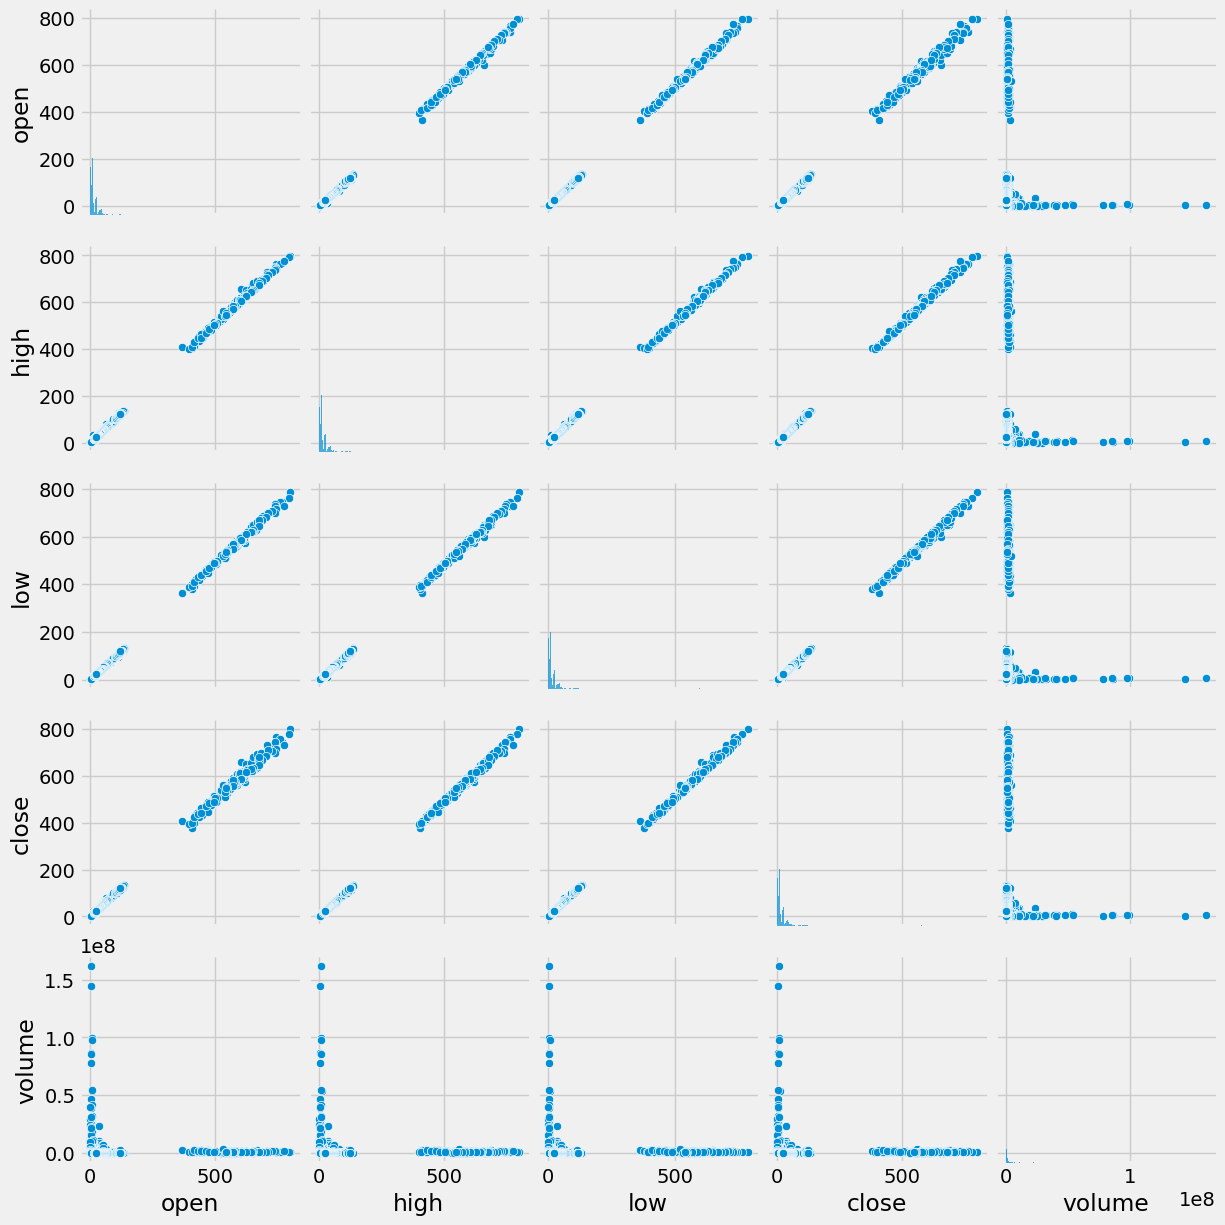

In [11]:
plt.figure(figsize=(30, 10))
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume']])
plt.show()

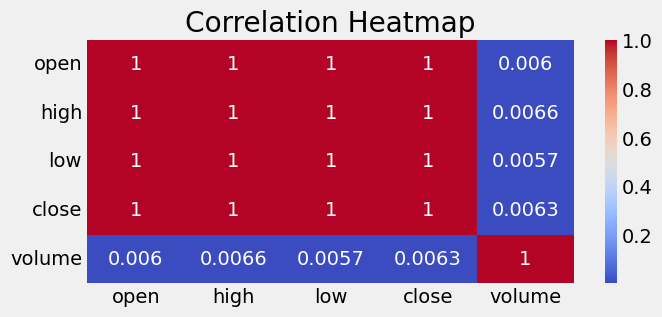

In [12]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

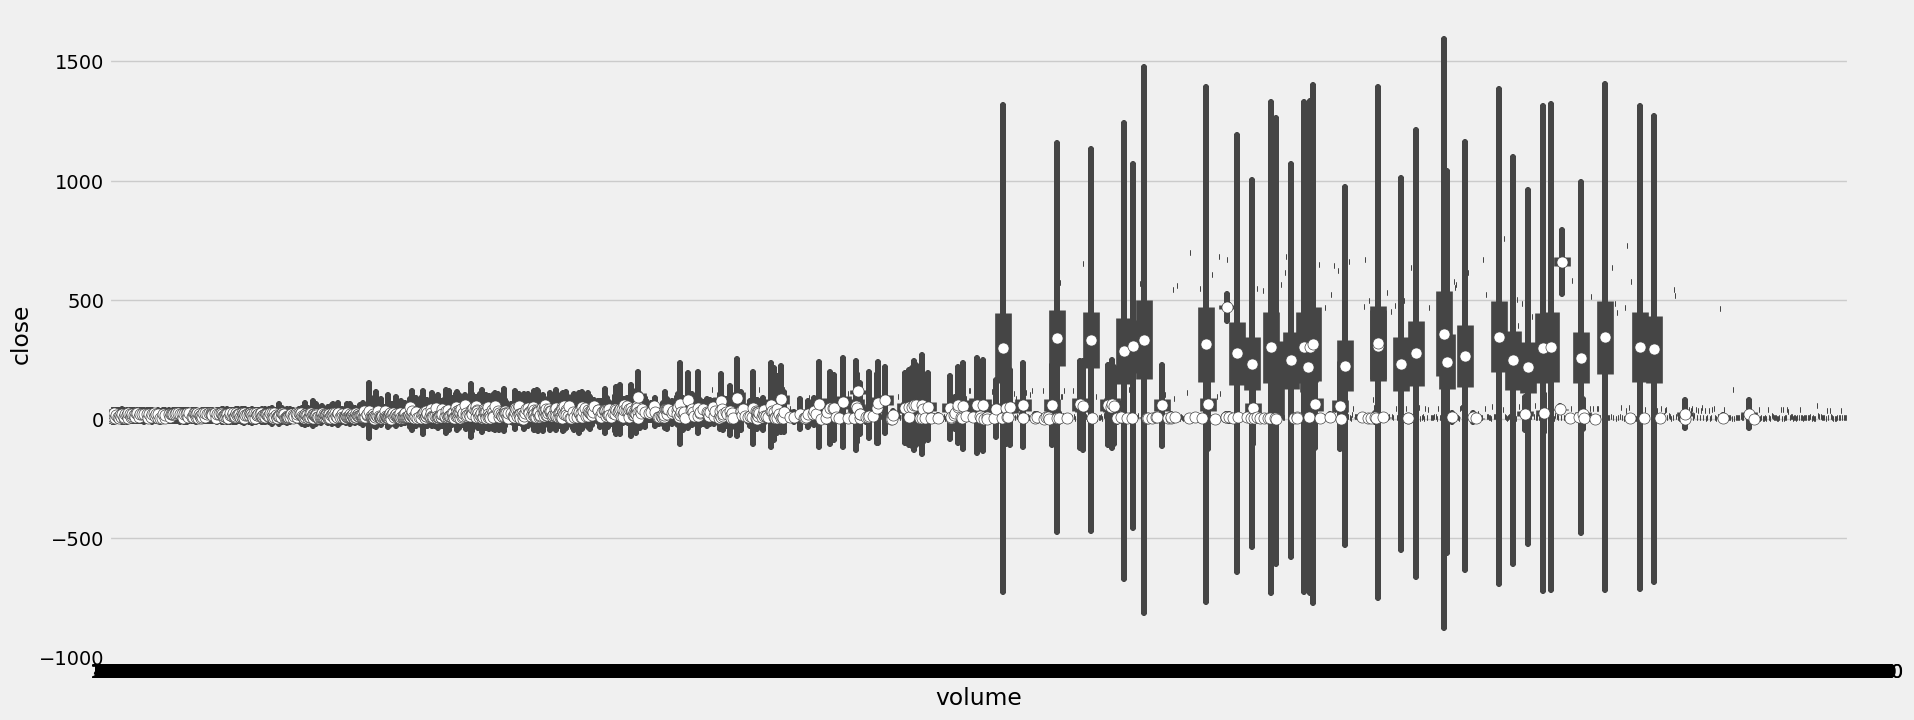

In [13]:
plt.figure(figsize=(20, 8))
sns.violinplot(x='volume', y='close', data=df)
plt.show()

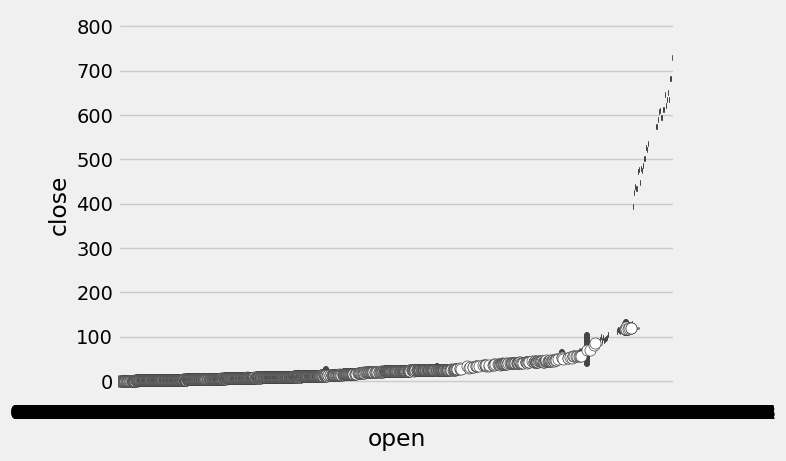

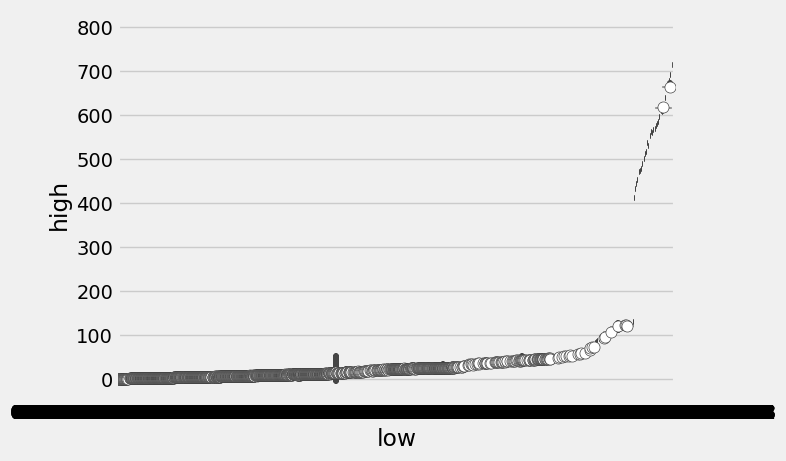

In [14]:
sns.violinplot(x='open', y='close', data=df)
plt.show()
sns.violinplot(x='low', y='high', data=df)
plt.show()

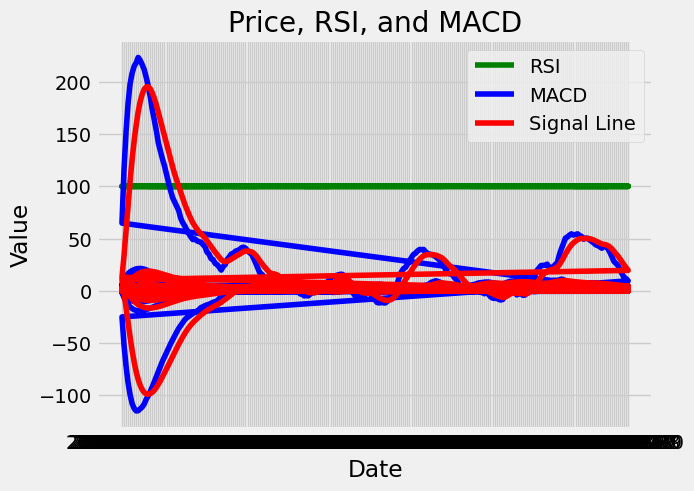

         date  RSI      MACD  Signal_Line
0  2022-01-03  NaN  0.719000     0.719000
1  2022-01-04  NaN  0.724111     0.720022
2  2022-01-05  NaN  0.701858     0.716389
3  2022-01-06  NaN  0.602065     0.693524
4  2022-01-07  NaN  0.472461     0.649312


In [15]:
# Calculate a Simple Moving Average (SMA) of 'Volume'
window = 50  # Adjust the window size as needed
df['Volume_SMA'] = df['volume'].rolling(window=window).mean()
# Calculate RSI using 'High' and 'Low'
window = 14  # Adjust the window size as needed
delta = df['high'] - df['low']
avg_gain = delta.where(delta > 0, 0).rolling(window=window).mean()
avg_loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df['RSI'] = rsi
# Calculate MACD using 'High' and 'Low'
short_window = 12  # Adjust the short-term window as needed
long_window = 26  # Adjust the long-term window as needed
signal_window = 9  # Adjust the signal window as needed
short_ema = df['high'].ewm(span=short_window, adjust=False).mean()
long_ema = df['low'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = short_ema - long_ema
df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
plt.plot(df['date'], df['RSI'], label='RSI', color='green')

# Adding MACD and Signal Line to the same plot
plt.plot(df['date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['date'], df['Signal_Line'], label='Signal Line', color='red')
# Customize the plot (labels, legend, etc.)
plt.title('Price, RSI, and MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()
# Print RSI and MACD values for the first few rows
print(df[['date', 'RSI', 'MACD', 'Signal_Line']].head())

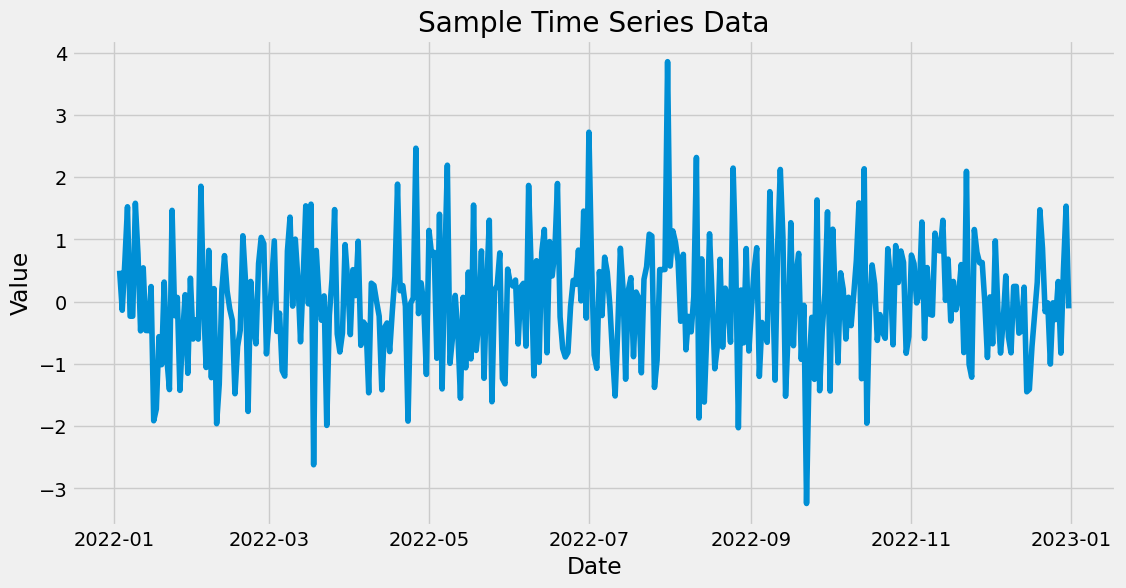

Results of Dickey-Fuller Test:
Test Statistic                 -20.209673
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


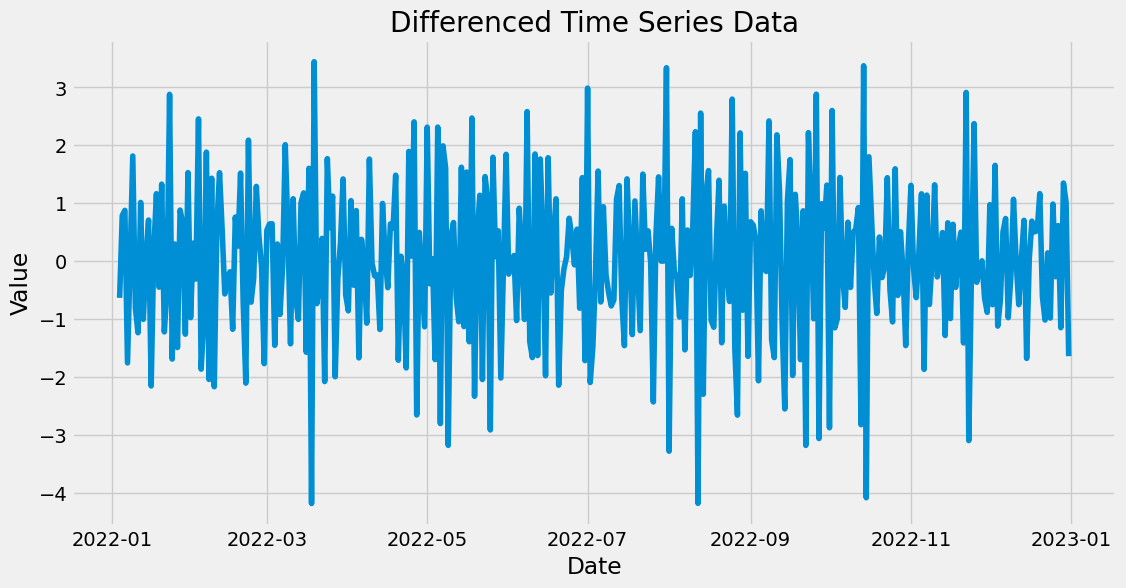

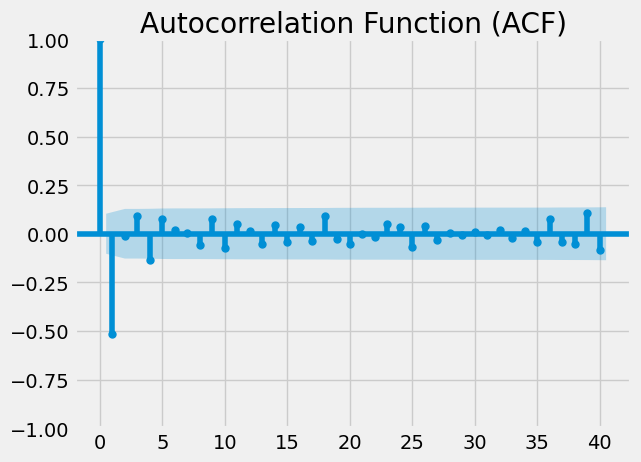

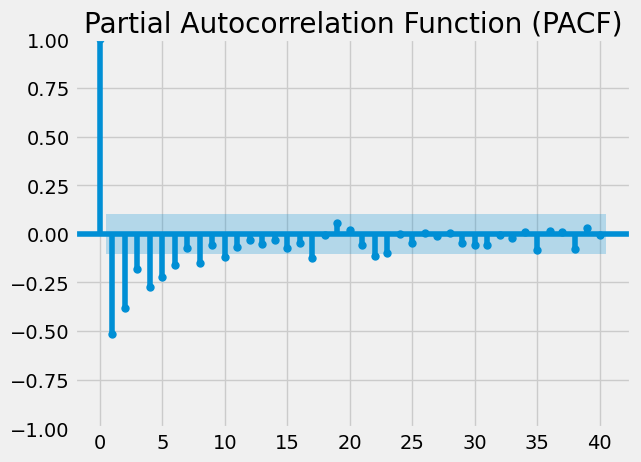

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -497.275
Date:                Sat, 02 Sep 2023   AIC                           1000.551
Time:                        14:10:08   BIC                           1012.226
Sample:                    01-03-2022   HQIC                          1005.192
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0611      0.055     -1.109      0.268      -0.169       0.047
ma.L1         -0.9956      0.013    -75.811      0.000      -1.021      -0.970
sigma2         0.9014      0.059     15.346      0.0

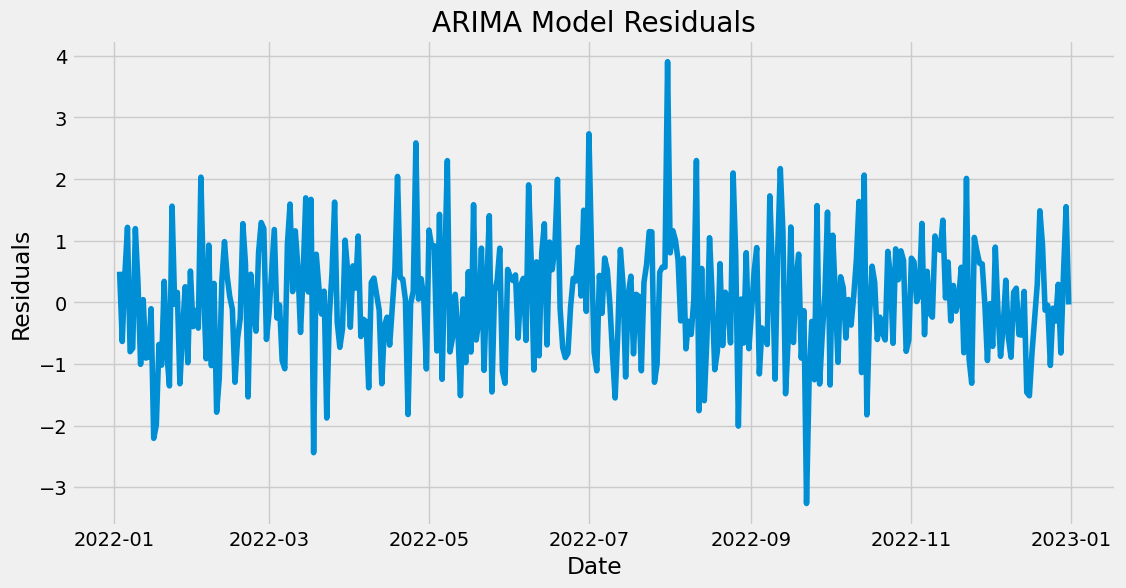

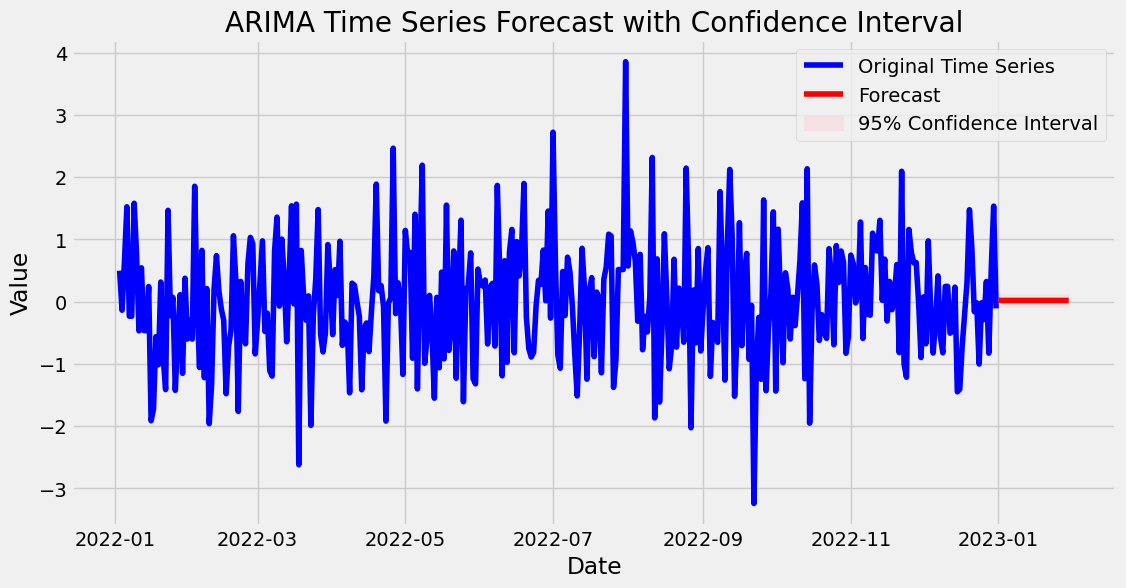

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(42)
date_rng = pd.date_range(start="2022-01-03", end="2022-12-31", freq="D")
data = np.random.randn(len(date_rng))
ts = pd.Series(data, index=date_rng)
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title("Sample Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)

test_stationarity(ts)

# Differencing to make the time series stationary
ts_diff = ts.diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(ts_diff)
plt.title("Differenced Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Plot ACF and PACF plots to identify p and q values for ARIMA
plot_acf(ts_diff, lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(ts_diff, lags=40)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# Fit the ARIMA model
p = 1  # Order of AR term (from PACF)
d = 1  # Order of differencing (1 for first difference)
q = 1  # Order of MA term (from ACF)
model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the model residuals
plt.figure(figsize=(12, 6))
plt.plot(results.resid)
plt.title("ARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()
forecast_steps = 30  # Number of future time steps to forecast
forecast = results.forecast(steps=forecast_steps)

# Calculate a confidence interval manually (e.g., using standard errors)
# Replace this with a suitable method for your data
# For example, using the standard error of past residuals as a rough estimate
forecast_std = np.std(results.resid)
confidence_interval = 1.96 * (forecast_std / np.sqrt(len(ts)))

# Plot the original time series and forecasts with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Original Time Series", color="blue")
forecast_dates = ts.index[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit="D")
plt.plot(forecast_dates, forecast, label="Forecast", color="red")
plt.fill_between(
    forecast_dates,
    forecast - confidence_interval,
    forecast + confidence_interval,
    color="pink",
    alpha=0.3,
    label="95% Confidence Interval",
)
plt.title("ARIMA Time Series Forecast with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

Mean Squared Error: 0.19025434185520593


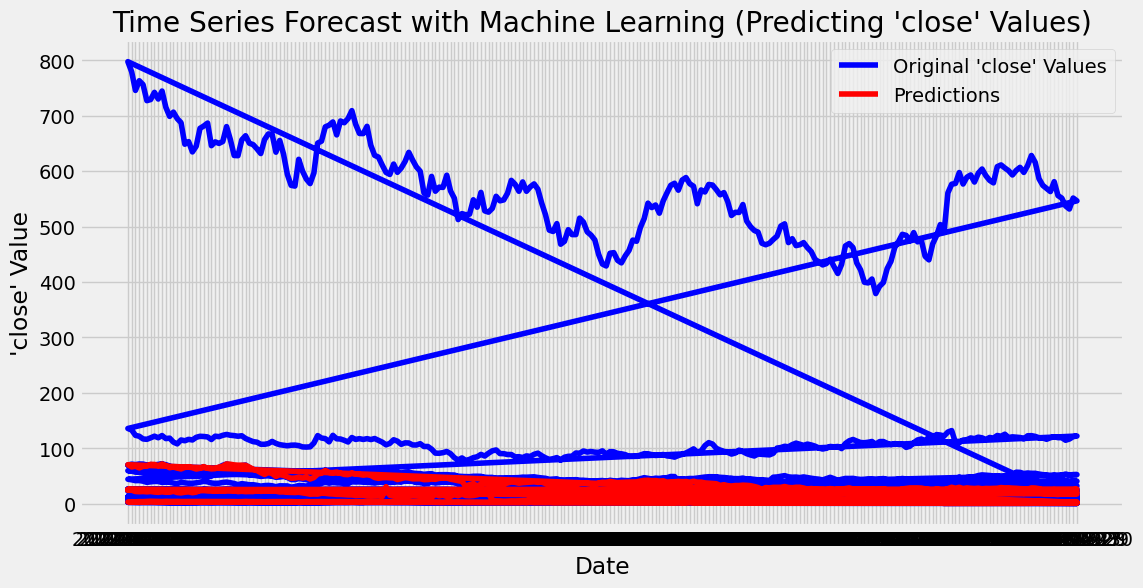

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['date', 'open', 'high', 'low', 'volume']]  # Features (including 'date')
y = df['close']  # Target variable (values to predict)

# Split the data into training and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train a machine learning model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train[['open', 'high', 'low', 'volume']], y_train)  # Use relevant features for prediction

# Make predictions on the test set
y_pred = model.predict(X_test[['open', 'high', 'low', 'volume']])  # Use the same features

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the original 'close' values and predictions
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label="Original 'close' Values", color="blue")
plt.plot(X_test['date'], y_pred, label="Predictions", color="red")
plt.title("Time Series Forecast with Machine Learning (Predicting 'close' Values)")
plt.xlabel("Date")
plt.ylabel("'close' Value")
plt.legend()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year'] = df['date'].dt.year  # Extract year as a numerical feature
df['month'] = df['date'].dt.month  # Extract month as a numerical feature
# Add more date-time features as needed (e.g., day, dayofweek, etc.)

# Select relevant features and target variable
X = df[['year', 'month', 'open', 'high', 'low']]  # Include date-time features and numeric columns
y = df['close']  # Your target variable

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVR(kernel='linear', C=1.0)
model.fit(X_scaled, y)

# Make predictions, evaluate the model, and visualize results as mentioned earlier.


SVR(kernel='linear')

In [19]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Assuming you have X_train, y_train, X_test, y_test prepared and scaled
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust hyperparameters as needed
y_pred = model.predict(X_test)
h = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

2.13.0


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have already trained your regression model and made predictions

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2}")

# You can calculate additional metrics as needed


Mean Absolute Error (MAE): 0.20330917808076562
Mean Squared Error (MSE): 0.19025434185520593
Root Mean Squared Error (RMSE): 0.43618154689900157
R-squared (R²) Score: 0.9989921052311136


In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year'] = df['date'].dt.year  # Extract year as a numerical feature
df['month'] = df['date'].dt.month  # Extract month as a numerical feature
# Add more date-time features as needed (e.g., day, dayofweek, etc.)

# Select relevant features and target variable
X = df[['year', 'month', 'open', 'high', 'low']]  # Include date-time features and numeric columns
y = df['close']  # Your target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the PassiveAggressiveRegressor model
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)

# Calculate the model score on the test set
score = model.score(X_test, y_test)
print(f"Model Score: {score}")

# Make predictions for new features
features = np.array([[2022, 1, 282.0, 233.0, 4.0]])
predictions = model.predict(features)
print(f"Predicted Close Price: {predictions[0]}")

# Calculate Mean Squared Error (MSE) as an evaluation metric
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Model Score: 0.9994603375149337
Predicted Close Price: 169.8131291340584
Mean Squared Error (MSE): 4.563152030806232


c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but PassiveAggressiveRegressor was fitted with feature names

